In [ ]:
!pip install torch torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install transformers==4.40.0 datasets accelerate

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118


Kullanılan cihaz: cpu
Konfigürasyon:
  batch_size: 8
  num_epochs: 5
  learning_rate: 5e-05
  random_seed: 42
  freeze_hubert: True
  early_stopping_patience: 5
=== HUBERT SES SINIFLANDIRMA EĞİTİMİ ===
Veri yükleme seçenekleri:
1. Google Drive'dan yükle
2. Dosya yükle (ZIP/RAR)
3. Manuel yükleme
'data' klasörü bulunamadı!
Google Drive'dan veri yükleniyor...
Mounted at /content/drive
Google Drive başarıyla bağlandı!
Drive'da veri bulundu: /content/drive/MyDrive/MakineOgrenmesiProjesi/Egitim_Verileri
Veri kopyalandı!
Kullanılan sınıflar: ['astim', 'bronşit', 'krup', 'normal', 'zatüre']
Veri yükleniyor...
Toplam 250 örnek yüklendi
  astim: 50 örnek
  bronşit: 50 örnek
  krup: 50 örnek
  normal: 50 örnek
  zatüre: 50 örnek
Train: 175, Val: 37, Test: 38

Model oluşturuluyor...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/378M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/378M [00:00<?, ?B/s]

Hubert modeli freeze edildi.
Toplam parametre sayısı: 94,668,933
Eğitilebilir parametre sayısı: 297,221


Epoch 1/5 - Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch 1/5 - Validation:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5:
  Train Loss: 1.5944, Train Acc: 20.57%
  Val Loss: 1.5701, Val Acc: 21.62%
  Yeni en iyi model kaydedildi! (Val Acc: 21.62%)


Epoch 2/5 - Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch 2/5 - Validation:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 2/5:
  Train Loss: 1.5602, Train Acc: 48.00%
  Val Loss: 1.5386, Val Acc: 62.16%
  Yeni en iyi model kaydedildi! (Val Acc: 62.16%)


Epoch 3/5 - Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch 3/5 - Validation:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 3/5:
  Train Loss: 1.5292, Train Acc: 66.29%
  Val Loss: 1.5152, Val Acc: 70.27%
  Yeni en iyi model kaydedildi! (Val Acc: 70.27%)


Epoch 4/5 - Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch 4/5 - Validation:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 4/5:
  Train Loss: 1.5167, Train Acc: 61.71%
  Val Loss: 1.5028, Val Acc: 70.27%


Epoch 5/5 - Training:   0%|          | 0/22 [00:00<?, ?it/s]

Epoch 5/5 - Validation:   0%|          | 0/5 [00:00<?, ?it/s]

Epoch 5/5:
  Train Loss: 1.5129, Train Acc: 68.00%
  Val Loss: 1.4996, Val Acc: 70.27%

Eğitim süresi: 58.79 dakika

--- Eğitim Sonu Metrikleri ---
Son Train Accuracy: 68.0000
Son Validation Accuracy: 70.2703
Son Train Loss: 1.5129
Son Validation Loss: 1.4996


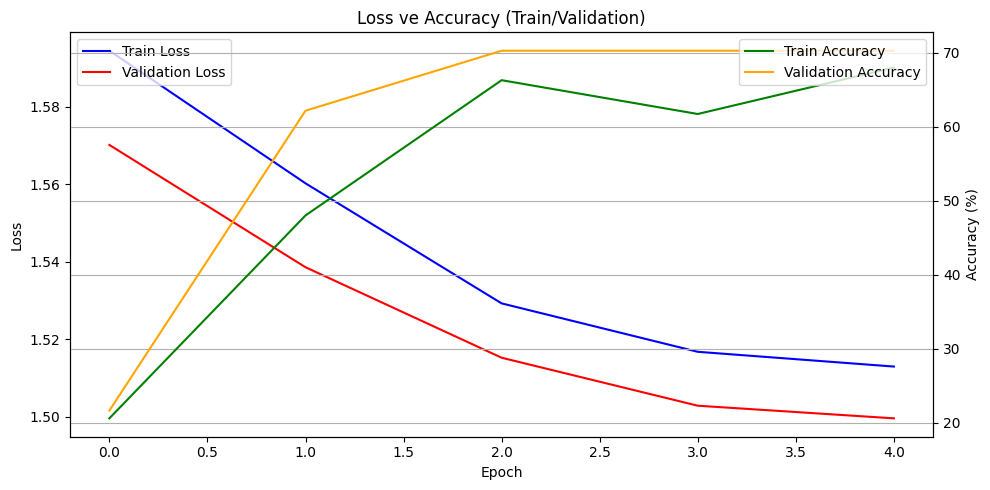


En iyi model yükleniyor ve test ediliyor...


Testing:   0%|          | 0/5 [00:00<?, ?it/s]


Sınıflandırma Raporu:
              precision    recall  f1-score   support

       astim     1.0000    0.8750    0.9333         8
    bronşit     0.5385    1.0000    0.7000         7
        krup     1.0000    0.8750    0.9333         8
      normal     0.8571    0.7500    0.8000         8
     zatüre     1.0000    0.5714    0.7273         7

    accuracy                         0.8158        38
   macro avg     0.8791    0.8143    0.8188        38
weighted avg     0.8849    0.8158    0.8243        38

Accuracy: 0.8158
Precision: 0.8791
Recall (Sensitivity): 0.8143
Specificity: 0.8791
F1-Score: 0.8188
AUC: 0.9416


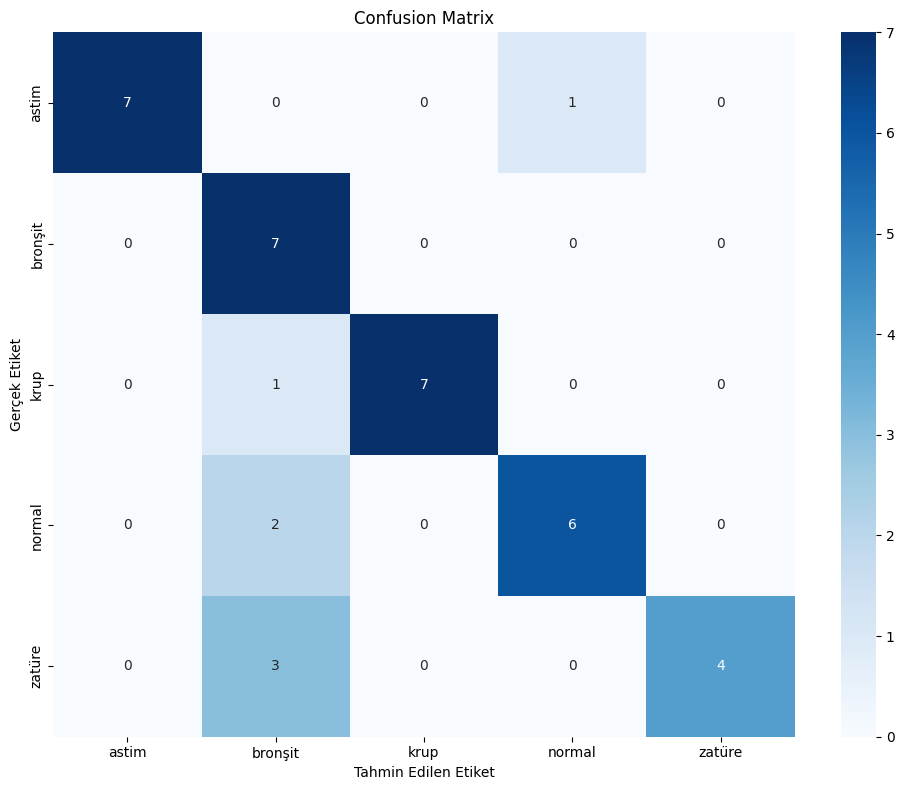

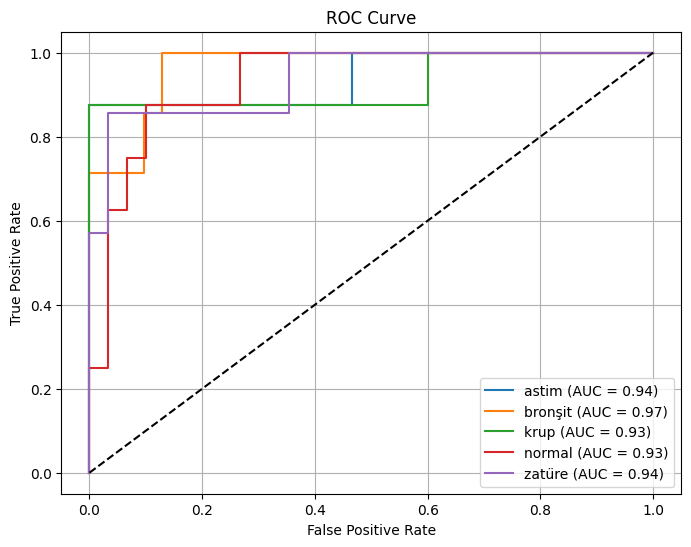

Test/Inference süresi: 57.44 saniye


TypeError: Object of type int64 is not JSON serializable

In [ ]:
# Hubert Ses Sınıflandırma - Google Colab

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import HubertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, precision_recall_fscore_support, accuracy_score
from sklearn.preprocessing import label_binarize
import torchaudio
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import json
from datetime import datetime
import zipfile
from google.colab import files, drive
import time

# GPU kontrolü
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Kullanılan cihaz: {device}')
if torch.cuda.is_available():
    print(f'GPU: {torch.cuda.get_device_name(0)}')
    print(f'GPU Bellek: {torch.cuda.get_device_properties(0).total_memory / 1024**3:.1f} GB')

# Eğitim parametreleri
config = {
    'batch_size': 8,
    'num_epochs': 5,
    'learning_rate': 5e-5,
    'random_seed': 42,
    'freeze_hubert': True,
    'early_stopping_patience': 5
}

print("Konfigürasyon:")
for key, value in config.items():
    print(f"  {key}: {value}")

def load_wav(file_path, target_sr=16000, max_length=80000):
    """WAV dosyasını yükle ve işle"""
    try:
        waveform, sr = torchaudio.load(file_path)
        if sr != target_sr:
            waveform = torchaudio.transforms.Resample(orig_freq=sr, new_freq=target_sr)(waveform)
        waveform = waveform.mean(dim=0)  # mono
        if waveform.shape[0] > max_length:
            waveform = waveform[:max_length]
        else:
            pad = max_length - waveform.shape[0]
            waveform = torch.nn.functional.pad(waveform, (0, pad))
        return waveform
    except Exception as e:
        print(f"Hata {file_path}: {e}")
        return None

class AudioWavDataset(Dataset):
    def __init__(self, data_paths, labels):
        self.data_paths = data_paths
        self.labels = labels
    def __len__(self):
        return len(self.data_paths)
    def __getitem__(self, idx):
        wav = load_wav(self.data_paths[idx])
        label = self.labels[idx]
        return wav, label

def load_data(data_dir, class_names):
    data_paths = []
    labels = []
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for file_name in os.listdir(class_dir):
                if file_name.endswith('.wav'):
                    file_path = os.path.join(class_dir, file_name)
                    data_paths.append(file_path)
                    labels.append(class_idx)
    return data_paths, labels

class HubertWavClassifier(nn.Module):
    def __init__(self, num_classes, hidden_size=768, dropout=0.1, freeze_hubert=True):
        super().__init__()
        self.hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960")
        if freeze_hubert:
            for param in self.hubert.parameters():
                param.requires_grad = False
            print("Hubert modeli freeze edildi.")
        else:
            print("Hubert modeli eğitilebilir.")
        self.classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_size//2, num_classes)
        )
    def forward(self, wav_input):
        attn_mask = (wav_input != 0).long()
        outputs = self.hubert(input_values=wav_input, attention_mask=attn_mask, return_dict=True)
        pooled = outputs.last_hidden_state.mean(dim=1)
        logits = self.classifier(pooled)
        return logits

def train_model(model, train_loader, val_loader, num_epochs, device, learning_rate=5e-5, patience=5):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=0.01)
    scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
    best_val_acc = 0.0
    patience_counter = 0
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        try:
            model.train()
            train_loss, train_correct, train_total = 0.0, 0, 0
            for batch_idx, (wavs, labels) in enumerate(tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training')):
                try:
                    wavs, labels = wavs.to(device), labels.to(device)
                    optimizer.zero_grad()
                    outputs = model(wavs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()
                    train_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    train_total += labels.size(0)
                    train_correct += (predicted == labels).sum().item()
                except Exception as e:
                    print(f"Eğitim batch hatası: {e}")
                    continue
            train_acc = 100 * train_correct / train_total
            avg_train_loss = train_loss / len(train_loader)
            model.eval()
            val_loss, val_correct, val_total = 0.0, 0, 0
            with torch.no_grad():
                for wavs, labels in tqdm(val_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Validation'):
                    try:
                        wavs, labels = wavs.to(device), labels.to(device)
                        outputs = model(wavs)
                        loss = criterion(outputs, labels)
                        val_loss += loss.item()
                        _, predicted = torch.max(outputs.data, 1)
                        val_total += labels.size(0)
                        val_correct += (predicted == labels).sum().item()
                    except Exception as e:
                        print(f"Validasyon batch hatası: {e}")
                        continue
            val_acc = 100 * val_correct / val_total
            avg_val_loss = val_loss / len(val_loader)
            train_losses.append(avg_train_loss)
            val_losses.append(avg_val_loss)
            train_accs.append(train_acc)
            val_accs.append(val_acc)
            print(f'Epoch {epoch+1}/{num_epochs}:')
            print(f'  Train Loss: {avg_train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'  Val Loss: {avg_val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            if val_acc > best_val_acc:
                best_val_acc = val_acc
                patience_counter = 0
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': model.state_dict(),
                    'optimizer_state_dict': optimizer.state_dict(),
                    'val_acc': val_acc,
                    'class_names': class_names,
                    'config': config
                }, 'best_hubert_model.pth')
                print(f'  Yeni en iyi model kaydedildi! (Val Acc: {val_acc:.2f}%)')
            else:
                patience_counter += 1
            if patience_counter >= patience:
                print(f'Early stopping! {patience} epoch boyunca iyileşme olmadı.')
                break
            scheduler.step()
        except Exception as e:
            print(f"Epoch {epoch+1} hatası: {e}")
            continue
    return train_losses, val_losses, train_accs, val_accs

def evaluate_model(model, test_loader, device, class_names, return_probs=False):
    model.eval()
    all_predictions, all_labels, all_probs = [], [], []
    with torch.no_grad():
        for wavs, labels in tqdm(test_loader, desc='Testing'):
            wavs, labels = wavs.to(device), labels.to(device)
            outputs = model(wavs)
            probs = torch.softmax(outputs, dim=1)
            _, predicted = torch.max(probs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    # Metrikler
    print("\nSınıflandırma Raporu:")
    print(classification_report(all_labels, all_predictions, target_names=class_names, digits=4))
    acc = accuracy_score(all_labels, all_predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_predictions, average='macro')
    cm = confusion_matrix(all_labels, all_predictions)
    sensitivity = recall  # Duyarlılık (Recall)
    specificity = np.mean([cm[i,i]/(cm[:,i].sum() if cm[:,i].sum()>0 else 1) for i in range(len(class_names))])
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall (Sensitivity): {recall:.4f}")
    print(f"Specificity: {specificity:.4f}")
    print(f"F1-Score: {f1:.4f}")
    # ROC ve AUC
    y_true_bin = label_binarize(all_labels, classes=list(range(len(class_names))))
    auc = roc_auc_score(y_true_bin, np.array(all_probs), average='macro', multi_class='ovr')
    print(f"AUC: {auc:.4f}")
    # Confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('Gerçek Etiket')
    plt.xlabel('Tahmin Edilen Etiket')
    plt.tight_layout()
    plt.show()
    # ROC eğrileri
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], np.array(all_probs)[:, i])
        plt.plot(fpr, tpr, label=f"{class_names[i]} (AUC = {roc_auc_score(y_true_bin[:, i], np.array(all_probs)[:, i]):.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()
    if return_probs:
        return all_predictions, all_labels, all_probs
    else:
        return all_predictions, all_labels

def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    fig, ax1 = plt.subplots(figsize=(10, 5))
    ax1.plot(train_losses, label='Train Loss', color='blue')
    ax1.plot(val_losses, label='Validation Loss', color='red')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend(loc='upper left')
    ax2 = ax1.twinx()
    ax2.plot(train_accs, label='Train Accuracy', color='green')
    ax2.plot(val_accs, label='Validation Accuracy', color='orange')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend(loc='upper right')
    plt.title('Loss ve Accuracy (Train/Validation)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def mount_google_drive():
    try:
        drive.mount('/content/drive')
        print("Google Drive başarıyla bağlandı!")
        return True
    except Exception as e:
        print(f"Google Drive bağlantı hatası: {e}")
        return False

def load_data_from_drive():
    print("Google Drive'dan veri yükleniyor...")
    if not mount_google_drive():
        return False
    drive_data_path = '/content/drive/MyDrive/MakineOgrenmesiProjesi/Egitim_Verileri'
    if os.path.exists(drive_data_path):
        print(f"Drive'da veri bulundu: {drive_data_path}")
        os.system(f'cp -r \"{drive_data_path}\" ./data')
        print("Veri kopyalandı!")
        return True
    else:
        print("Drive'da 'data' klasörü bulunamadı!")
        return False

def upload_and_extract_data():
    print("Lütfen veri dosyanızı yükleyin (ZIP veya RAR)...")
    uploaded = files.upload()
    for filename in uploaded.keys():
        print(f"Yüklenen dosya: {filename}")
        if filename.endswith('.zip'):
            print(f"{filename} dosyası çıkarılıyor...")
            with zipfile.ZipFile(filename, 'r') as zip_ref:
                zip_ref.extractall('.')
            print("ZIP çıkarma tamamlandı!")
            return True
        elif filename.endswith('.rar'):
            print(f"{filename} RAR dosyası tespit edildi...")
            try:
                import rarfile
                with rarfile.RarFile(filename, 'r') as rar_ref:
                    rar_ref.extractall('.')
                print("RAR çıkarma tamamlandı!")
                return True
            except ImportError:
                print("rarfile kütüphanesi yükleniyor...")
                os.system('pip install rarfile')
                try:
                    import rarfile
                    with rarfile.RarFile(filename, 'r') as rar_ref:
                        rar_ref.extractall('.')
                    print("RAR çıkarma tamamlandı!")
                    return True
                except Exception as e:
                    print(f"RAR çıkarma hatası: {e}")
                    return False
    print("Desteklenen dosya formatı bulunamadı!")
    return False

def check_data_structure():
    if os.path.exists('data'):
        print("'data' klasörü bulundu!")
        for name in os.listdir('data'):
            print("Klasör:", name, "| Karakterler:", [c for c in name])
        return True
    else:
        print("'data' klasörü bulunamadı!")
        return False

print("=== HUBERT SES SINIFLANDIRMA EĞİTİMİ ===")
print("Veri yükleme seçenekleri:")
print("1. Google Drive'dan yükle")
print("2. Dosya yükle (ZIP/RAR)")
print("3. Manuel yükleme")

if not check_data_structure():
    if not load_data_from_drive():
        if not upload_and_extract_data():
            print("\n" + "="*50)
            print("MANUEL VERİ YÜKLEME TALİMATLARI:")
            print("1. RAR dosyanızı bilgisayarınızda çıkarın")
            print("2. 'data' klasörünü Colab'a yükleyin")
            print("3. Kodu tekrar çalıştırın")
            print("="*50)
            exit()

# --- OTOMATİK SINIF ADI BULMA ---
class_names = sorted([d for d in os.listdir('data') if os.path.isdir(os.path.join('data', d))])
print("Kullanılan sınıflar:", class_names)

torch.manual_seed(config['random_seed'])
np.random.seed(config['random_seed'])

print("Veri yükleniyor...")
data_paths, labels = load_data('data', class_names)

if len(data_paths) == 0:
    print("Hata: data dizininde veri bulunamadı!")
    print("Beklenen dizin yapısı:")
    for class_name in class_names:
        print(f"  data/{class_name}/*.wav")
else:
    print(f"Toplam {len(data_paths)} örnek yüklendi")
    for i, class_name in enumerate(class_names):
        count = labels.count(i)
        print(f"  {class_name}: {count} örnek")
    train_paths, temp_paths, train_labels, temp_labels = train_test_split(
        data_paths, labels, test_size=0.3, random_state=config['random_seed'], stratify=labels
    )
    val_paths, test_paths, val_labels, test_labels = train_test_split(
        temp_paths, temp_labels, test_size=0.5, random_state=config['random_seed'], stratify=temp_labels
    )
    print(f"Train: {len(train_paths)}, Val: {len(val_paths)}, Test: {len(test_paths)}")
    train_dataset = AudioWavDataset(train_paths, train_labels)
    val_dataset = AudioWavDataset(val_paths, val_labels)
    test_dataset = AudioWavDataset(test_paths, test_labels)
    train_loader = DataLoader(train_dataset, batch_size=config['batch_size'], shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=0)
    test_loader = DataLoader(test_dataset, batch_size=config['batch_size'], shuffle=False, num_workers=0)
    print("\nModel oluşturuluyor...")
    model = HubertWavClassifier(
        num_classes=len(class_names),
        freeze_hubert=config['freeze_hubert']
    ).to(device)
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    print(f"Toplam parametre sayısı: {total_params:,}")
    print(f"Eğitilebilir parametre sayısı: {trainable_params:,}")

    # Eğitim zamanı ölçümü
    train_start = time.time()
    train_losses, val_losses, train_accs, val_accs = train_model(
        model, train_loader, val_loader,
        config['num_epochs'], device,
        config['learning_rate'],
        config['early_stopping_patience']
    )
    train_end = time.time()
    print(f"\nEğitim süresi: {(train_end-train_start)/60:.2f} dakika")

    # Eğitim ve validasyon metrikleri (son epoch)
    print("\n--- Eğitim Sonu Metrikleri ---")
    print(f"Son Train Accuracy: {train_accs[-1]:.4f}")
    print(f"Son Validation Accuracy: {val_accs[-1]:.4f}")
    print(f"Son Train Loss: {train_losses[-1]:.4f}")
    print(f"Son Validation Loss: {val_losses[-1]:.4f}")

    # Eğitim ve test loss/acc grafiği
    plot_training_history(train_losses, val_losses, train_accs, val_accs)

    # Test zamanı ve gelişmiş metrikler
    print("\nEn iyi model yükleniyor ve test ediliyor...")
    checkpoint = torch.load('best_hubert_model.pth', map_location=device)
    model.load_state_dict(checkpoint['model_state_dict'])
    inference_start = time.time()
    predictions, true_labels, y_probs = evaluate_model(model, test_loader, device, class_names, return_probs=True)
    inference_end = time.time()
    print(f"Test/Inference süresi: {(inference_end-inference_start):.2f} saniye")

    # Sonuçları kaydet
    results = {
        'best_val_acc': checkpoint['val_acc'],
        'best_epoch': checkpoint['epoch'],
        'class_names': class_names,
        'config': config,
        'test_predictions': predictions,
        'test_labels': true_labels
    }
    with open('training_results.json', 'w', encoding='utf-8') as f:
        json.dump(results, f, indent=2, ensure_ascii=False)
    print(f"\nEğitim tamamlandı!")
    print(f"En iyi validasyon accuracy: {checkpoint['val_acc']:.2f}%")
    print(f"En iyi epoch: {checkpoint['epoch']}")
    print("\nEğitilmiş model ve sonuçlar indiriliyor...")
    if os.path.exists('best_hubert_model.pth'):
        files.download('best_hubert_model.pth')
        print("Model dosyası indirildi: best_hubert_model.pth")
    if os.path.exists('training_results.json'):
        files.download('training_results.json')
        print("Sonuçlar indirildi: training_results.json")
    print("\nTüm dosyalar başarıyla indirildi!")
    print("\nModeli kullanmak için:")
    print("1. best_hubert_model.pth dosyasını bilgisayarınıza indirin")
    print("2. test_model.py scriptini kullanarak yeni ses dosyalarını test edebilirsiniz")